In [1]:
# This program produces a plot of the "nino3.4" monthly sea surface temperature
# deviations from climatology since 2010.  This index is an indicator
# of the state and strength of the El Nino / Southern Oscillation (ENSO) phenomenon.
#
# Todd Mitchel, June 2019

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tpm.py, which is also on this repository, is a module of geophysical data analysis functions.
# "TPM" are my initials.
import tpm   
dir(tpm) 

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'arclength',
 'fill_year',
 'find_latlon',
 'space_longitudes',
 'threetotwo',
 'write_ts',
 'yearsmonths',
 'yearsmonthsdays']

In [3]:
# Need this line to view plots in jupyter notebook
%matplotlib inline

In [4]:
# Ingest the data
from subprocess import call
# call( [ 'ls', '-l' ] ) # will execute the UNIX command 'ls -l' (no quotes)                        

call( [ 'wget', '--no-check-certificate', 'https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.\
mth.81-10.ascii' ] )  # Data downloaded from the NOAA Climate Prediction Center

fn = 'ersst5.nino.mth.81-10.ascii'


In [5]:
import pandas as pd
df = pd.read_csv( fn, delimiter=r"\s+" )
print( df.dtypes.index )
yr1 = df[ 'YR' ].min()  # Determine the first and last years of data
yr2 = df[ 'YR' ].max()
print( [ yr1, yr2 ] )

Index(['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2',
       'NINO3.4', 'ANOM.3'],
      dtype='object')
[1950, 2019]


In [6]:
# The nino3.4 timeseries is column 9 of the table.  I am ingesting deviations with
# respect to a 1981-2010 climatology
ts = df.iloc[ :, 9 ]
# The last year of data is sometimes ncomplete.  Add nan's to complete years.
ts = tpm.fill_year( ts )


In [7]:
call( [ '/bin/rm', 'ersst5.nino.mth.81-10.ascii' ] )  # Delete the file

nyr = yr2 - yr1 + 1
nt = nyr * 12


/Users/mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app
/Users/mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


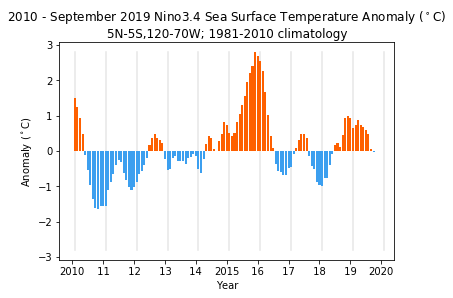

In [8]:
# The data spans 1950 - present.  Plot the data beginning with 2010

red  = tuple( np.asarray( [ 255,  96,   0, 256 ] ) / 256 )
blue = tuple( np.asarray( [  60, 160, 240, 256 ] ) / 256 )

x = np.arange( 1, len(ts)+1 ).astype( float )  # An index of abscissa points                       
skip =int( ( 2010 - yr1 ) * 12 )
x2  = x[  skip: ]
ts2 = ts[ skip: ]

ymax = max( np.abs( ts2 ) )
plt.clf()
for x3 in [ x2[ ::12 ], x[-1]+1 ]:
    plt.plot( [ x3, x3 ], [ -ymax, ymax ], zorder=0, color=( 0.9, 0.9, 0.9 ) )
plt.bar( x2[ ts2>=0 ], ts2[ ts2>=0 ], zorder=5, color=red )
plt.bar( x2[ ts2<  0 ], ts2[ ts2<   0 ], zorder=5, color=blue )
plt.xlim( ( skip-5, nt+5 ) )
plt.xticks( np.arange( skip+1, nt+12, step=12 ), ( '2010', ' 11 ', ' 12 ', ' 13 ', ' 14 ',
     '2015', ' 16 ', ' 17 ', ' 18 ', ' 19 ', '2020' ) )
plt.xticks( np.arange( skip, nt+12, step=12 ) )
plt.title( r'2010 - September 2019 Nino3.4 Sea Surface Temperature Anomaly ($^\circ$C)'
           '\n'
           r'5N-5S,120-70W; 1981-2010 climatology' )
plt.xlabel( 'Year')
plt.ylabel( 'Anomaly ($^\circ$C)')
plt.show()

# The runtime error you get with incomplete years, years that don't have data through December, 
# is that ts2 has missing values ( nan's ) for the months without data.  I expect that there 
# is a way to turn that error-message off.


In [9]:
plt.savefig( 'nino34september2019.png')

<Figure size 432x288 with 0 Axes>